In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

The first step in working with any dataset is loading the data in and noting what information is included in the dataset. This is an important step in eventually working with any data, and knowing what kinds of features we have to work with. In this notebook, we'll explore the data and observe the patterns in the data.

<br>1- Read data
<br>2- Study each attribute and it's characteristics:
    <br>    - *Name*
    <br>    - *Type*
    <br>    - *Missing values*
    <br>    - *Noisiness and type (stochastic, outliers, rounding errors, etc)*
    <br>    - *Type of distribution*
<br>3- Identify target attributes
<br>4- Visualize the data
<br>5- Study correlation between attributes
<br>6- Identify promissing transformations

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

In [71]:
import io
import os
import gc

import pandas as pd
import numpy as np
import pickle
import joblib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
azdias = pd.read_csv('azdias.csv')
customers = pd.read_csv('customers.csv')

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# number of rows and columns in dataset
print("AZDIAS Shape: {}".format(azdias.shape))
print("CUSTOMER Shape: {}".format(customers.shape))

AZDIAS Shape: (891221, 367)
CUSTOMER Shape: (191652, 370)


In [4]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [5]:
customers.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [6]:
values = pd.read_excel("DIAS Attributes - Values 2017.xlsx",engine='openpyxl',header = 0)

In [7]:
values.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Attribute,Description,Value,Meaning
1,NaN,AGER_TYP,best-ager typology,-1,unknown
2,NaN,NaN,NaN,0,no classification possible
3,NaN,NaN,NaN,1,passive elderly
4,NaN,NaN,NaN,2,cultural elderly


In [8]:
values.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
values.columns = ["Attribute","Description","Value","Meaning"]

In [10]:
# Drop first row 
# by selecting all rows from first row onwards
values = values.iloc[1: , :]

In [11]:
values.head(10)

,Attribute,Description,Value,Meaning
1,AGER_TYP,best-ager typology,-1,unknown
2,NaN,NaN,0,no classification possible
3,NaN,NaN,1,passive elderly
4,NaN,NaN,2,cultural elderly
5,NaN,NaN,3,experience-driven elderly
6,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
7,NaN,NaN,1,< 30 years
8,NaN,NaN,2,30 - 45 years
9,NaN,NaN,3,46 - 60 years
10,NaN,NaN,4,> 60 years


In [12]:
info = pd.read_excel("DIAS Information Levels - Attributes 2017.xlsx",engine='openpyxl',header = 0)

In [13]:
info.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Information level,Attribute,Description,Additional notes
1,NaN,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
2,NaN,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
3,NaN,NaN,ANREDE_KZ,gender,NaN
4,NaN,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."


In [14]:
info.drop('Unnamed: 0',axis = 1,inplace = True)
info.columns = ["Information level","Attribute","Description","Additional notes"]
# Drop first row 
# by selecting all rows from first row onwards
info = info.iloc[1: , :]
info.head()

,Information level,Attribute,Description,Additional notes
1,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
2,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
3,NaN,ANREDE_KZ,gender,NaN
4,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
5,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...


In [15]:
values.ffill(inplace=True) # Fill the NaN rows with description or attribute
values['Value'] = values['Value'].astype('str') # Changing datatype from object to str

values.head(25)

,Attribute,Description,Value,Meaning
1,AGER_TYP,best-ager typology,-1,unknown
2,AGER_TYP,best-ager typology,0,no classification possible
3,AGER_TYP,best-ager typology,1,passive elderly
4,AGER_TYP,best-ager typology,2,cultural elderly
5,AGER_TYP,best-ager typology,3,experience-driven elderly
6,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
7,ALTERSKATEGORIE_GROB,age classification through prename analysis,1,< 30 years
8,ALTERSKATEGORIE_GROB,age classification through prename analysis,2,30 - 45 years
9,ALTERSKATEGORIE_GROB,age classification through prename analysis,3,46 - 60 years
10,ALTERSKATEGORIE_GROB,age classification through prename analysis,4,> 60 years


In [16]:
meta_attributes = values['Attribute'].unique()

print("Total Number of unique attributes given to us in meta data: ",len(meta_attributes))
print("Total Number of unique attributes AZIDAS data: ",azdias.columns.size)
print("Total Number of unique attributes CUSTOMERS data: ",customers.columns.size)


Total Number of unique attributes given to us in meta data:  314
Total Number of unique attributes AZIDAS data:  367
Total Number of unique attributes CUSTOMERS data:  370


The number of attributes given is not same in the three datasets. This means some of the attributes were not important enough to be included in the meta data.

In [17]:
# Finding common attributes bettween AZDIAS and Customers
common_azdias_customers = list(set(customers.columns).intersection(azdias.columns))
diffr_azdias_customers = list(set(customers.columns).difference(azdias.columns))

In [18]:
print("Number of attributes common between Customer and AZDIAS: {}".format(len(common_azdias_customers)))
print("Number of attributes exclusive to Customer: {}".format(len(diffr_azdias_customers)))
print("Attributes exclusive to CUSTOMERS: {}".format(diffr_azdias_customers))

Number of attributes common between Customer and AZDIAS: 367
Number of attributes exclusive to Customer: 3
Attributes exclusive to CUSTOMERS: ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']


**ONLINE_PURCHASE**, **PRODUCT_GROUP** and **CUSTOMER_GROUP** are the attributes which are not in AZDIAS dataframe, but both datasets share rest of the features.

In [19]:
attr_common_all = set(common_azdias_customers).intersection(meta_attributes)
attr_common_customers = set(customers.columns).intersection(meta_attributes)
attr_cust_diffr_meta = set(customers.columns).difference(meta_attributes)
attr_meta_diffr_cust = set(meta_attributes).difference(customers.columns)

print('Len of total common attributes in all 3 tables',len(attr_common_all))
print('Len of attributes common in customers and meta data',len(attr_common_customers))
print('Len of attributes in Customers but not in meta',len(attr_cust_diffr_meta))
print('Len of attributes in meta data but not in customers',len(attr_meta_diffr_cust))


Len of total common attributes in all 3 tables 272
Len of attributes common in customers and meta data 272
Len of attributes in Customers but not in meta 98
Len of attributes in meta data but not in customers 42


There are 98 attributes in customers data that are not present in meta-data. Now, let's see what attributes are these.

In [20]:
print("Attributes exclusive to customers data","\n","\n".join(list(attr_cust_diffr_meta)))
print("******************************************************")
print("******************************************************")
print("******************************************************")
print("******************************************************")
print("Attributes exclusive to meta data","\n","\n".join(list(attr_meta_diffr_cust)))

Attributes exclusive to customers data 
 D19_TECHNIK
VERDICHTUNGSRAUM
VHA
KBA13_GBZ
KBA13_KMH_210
KBA13_ANTG1
RT_KEIN_ANREIZ
D19_RATGEBER
D19_BANKEN_GROSS
D19_HAUS_DEKO
ANZ_KINDER
CJT_TYP_2
HH_DELTA_FLAG
UMFELD_ALT
D19_SAMMELARTIKEL
D19_SCHUHE
D19_TELKO_REST
D19_LOTTO
KBA13_ANTG4
D19_BANKEN_LOKAL
KOMBIALTER
D19_BEKLEIDUNG_REST
SOHO_KZ
D19_VERSAND_REST
CJT_TYP_5
CUSTOMER_GROUP
D19_ENERGIE
EINGEFUEGT_AM
ANZ_STATISTISCHE_HAUSHALTE
EINGEZOGENAM_HH_JAHR
ALTER_KIND3
D19_SONSTIGE
D19_DROGERIEARTIKEL
D19_VERSI_OFFLINE_DATUM
CJT_TYP_3
D19_WEIN_FEINKOST
KONSUMZELLE
KBA13_ANTG2
KBA13_BAUMAX
D19_BEKLEIDUNG_GEH
D19_VERSI_ONLINE_QUOTE_12
EXTSEL992
D19_TIERARTIKEL
KBA13_HHZ
D19_BANKEN_DIREKT
D19_HANDWERK
D19_VERSICHERUNGEN
MOBI_RASTER
ONLINE_PURCHASE
STRUKTURTYP
D19_VOLLSORTIMENT
D19_TELKO_ONLINE_QUOTE_12
RT_SCHNAEPPCHEN
D19_DIGIT_SERV
RT_UEBERGROESSE
D19_BILDUNG
D19_LEBENSMITTEL
AKT_DAT_KL
CJT_TYP_6
VK_ZG11
GEMEINDETYP
ARBEIT
ALTER_KIND4
D19_KONSUMTYP_MAX
VHN
FIRMENDICHTE
CJT_TYP_1
D19_BUCH_CD
D19_T

CAMEO_DEUINTL_2015 in attributes dataset is names as CAMEO_INTL_2015 in customers dataset.

## Missing data
### Identifying missing data

In this section, we'll identify the missing data which is represented using other values given in meta data other irregularities.

In [21]:
attributes = values.loc[values['Attribute'].isin(attr_common_all)]

In [22]:
len(attributes.loc[:,'Attribute'].unique())

272

In [23]:
## check numbers / values signifying unknown values in dataset
attributes.loc[attributes['Meaning'].str.contains('unknown'),"Value"].unique()



array(['-1', '-1, 0', '0', '-1, 9'], dtype=object)

As we can see -1 , 9 and -1 marked as 'unknown' values,
this means other numerical values hold a significant , while these three values might be unknown

In [24]:
print("Keyword for 0: ")
print(attributes.loc[attributes['Value'].str.contains('0'),"Meaning"].unique())
print("*************************")
print("Keyword for -1: ")
print(attributes.loc[attributes['Value'].str.contains('-1'),"Meaning"].unique())
print("*************************")
print("Keyword for 9: ")
print(attributes.loc[attributes['Value'].str.contains('\D[9]', regex=True),"Meaning"].unique())


Keyword for 0: 
['no classification possible' 'unknown' 'unknown / no main age detectable'
 '01.01.1940 bis 31.12.1944' '01.01.1990 bis 31.12.1994'
 'no transactions known'
 'no Online-transactions within the last 12 months'
 '100% Online-transactions within the last 12 months' 'Connoisseurs'
 "doesn't belong to the green avantgarde" 'classification not possible'
 'none' 'no 1-2 family homes' 'no 3-5 family homes' 'no 6-10 family homes'
 'no >10 family homes' 'two-generational household'
 'multiperson household' 'wealthy single homeowners'
 'top earner-couples of higher age'
 'average earners of younger age from mulitperson households'
 'top earners at retirement age from mulitperson households'
 'low-income- and average earners of higher age from mulitperson households'
 'top earners ' '80ies - Generation Golf (Mainstream, W)'
 'external supplied hedonists ' 'no score calculated']
*************************
Keyword for -1: 
['unknown']
*************************
Keyword for 9: 
['unknow

-1, 9 (in given form) always represent unkown values, while 0 may hold some value in some cases


In [25]:
azdias['CAMEO_DEUG_2015'].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [26]:
azdias['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

In [27]:
azdias['EINGEFUEGT_AM'].unique()

array([nan, '1992-02-10 00:00:00', '1992-02-12 00:00:00', ...,
       '2010-12-02 00:00:00', '2005-03-19 00:00:00',
       '2011-11-18 00:00:00'], dtype=object)

As we see there are unknown values 'X' and 'XX' in **CAMEO_DEUG_2015**,**CAMEO_INTL_2015** columns. We will replace this with NaN and also convert the datatype of **EINGEFUEGT_AM** attribute to datetime type.

In [28]:
cols_X = ['CAMEO_DEUG_2015']
cols_XX = ['CAMEO_INTL_2015']
col_1 = attributes.loc[attributes["Value"].str.contains('-1'),
                     "Attribute"].unique()
col_0 = attributes.loc[(attributes["Value"].str.contains('0')) &
                     (attributes['Meaning'].str.contains('unknown')),
                      "Attribute"].unique()
col_9 = attributes.loc[attributes["Value"].str.contains('\D[9]', regex=True),
                     "Attribute"].unique()

In [29]:
value = {'X':cols_X , "XX":cols_XX , -1:col_1.tolist(),0:col_0.tolist(),9: col_9.tolist()}

In [30]:
value

{'X': ['CAMEO_DEUG_2015'],
 'XX': ['CAMEO_INTL_2015'],
 -1: ['AGER_TYP',
  'ALTERSKATEGORIE_GROB',
  'ANREDE_KZ',
  'BALLRAUM',
  'CAMEO_DEUG_2015',
  'EWDICHTE',
  'FINANZTYP',
  'FINANZ_ANLEGER',
  'FINANZ_HAUSBAUER',
  'FINANZ_MINIMALIST',
  'FINANZ_SPARER',
  'FINANZ_UNAUFFAELLIGER',
  'FINANZ_VORSORGER',
  'GEBAEUDETYP',
  'HEALTH_TYP',
  'HH_EINKOMMEN_SCORE',
  'INNENSTADT',
  'KBA05_ALTER1',
  'KBA05_ALTER2',
  'KBA05_ALTER3',
  'KBA05_ALTER4',
  'KBA05_ANHANG',
  'KBA05_ANTG1',
  'KBA05_ANTG2',
  'KBA05_ANTG3',
  'KBA05_ANTG4',
  'KBA05_AUTOQUOT',
  'KBA05_BAUMAX',
  'KBA05_CCM1',
  'KBA05_CCM2',
  'KBA05_CCM3',
  'KBA05_CCM4',
  'KBA05_DIESEL',
  'KBA05_FRAU',
  'KBA05_GBZ',
  'KBA05_HERST1',
  'KBA05_HERST2',
  'KBA05_HERST3',
  'KBA05_HERST4',
  'KBA05_HERST5',
  'KBA05_HERSTTEMP',
  'KBA05_KRSAQUOT',
  'KBA05_KRSHERST1',
  'KBA05_KRSHERST2',
  'KBA05_KRSHERST3',
  'KBA05_KRSKLEIN',
  'KBA05_KRSOBER',
  'KBA05_KRSVAN',
  'KBA05_KRSZUL',
  'KBA05_KW1',
  'KBA05_KW2',
  'KBA05

In [31]:
def replace_values(df, values=value):
    """Function to replace given values in given columns with nans.
    :param df: dataframe to perform operations on
    :param values: dictionary of values(key) to be replaced with 
    nan in the given columns(value)
    
    :return: dataframe with replaced values
    """
    
    for value, cols in values.items():
        to_replace = {value: np.nan}
        df[cols] = df.loc[:, cols].replace(to_replace)
        print("Replaced {} with nan in following column(s):{}".format(value, cols))
        
    return df

In [32]:
print("AZDIAS")
azdias_clean = replace_values(azdias, value)
print("CUSTOMERS")
customers_clean = replace_values(customers, value)

AZDIAS
Replaced X with nan in following column(s):['CAMEO_DEUG_2015']
Replaced XX with nan in following column(s):['CAMEO_INTL_2015']
Replaced -1 with nan in following column(s):['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'BALLRAUM', 'CAMEO_DEUG_2015', 'EWDICHTE', 'FINANZTYP', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'GEBAEUDETYP', 'HEALTH_TYP', 'HH_EINKOMMEN_SCORE', 'INNENSTADT', 'KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_AUTOQUOT', 'KBA05_BAUMAX', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_GBZ', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1', 'KB

Replaced 0 with nan in following column(s):['ALTERSKATEGORIE_GROB', 'ALTER_HH', 'ANREDE_KZ', 'CJT_GESAMTTYP', 'GEBAEUDETYP', 'HH_EINKOMMEN_SCORE', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'REGIOTYP', 'RETOURTYP_BK_S', 'TITEL_KZ', 'WOHNDAUER_2008', 'W_KEIT_KIND_HH']
Replaced 9 with nan in following column(s):['KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_AUTOQUOT', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8', 'KBA05_MODTEMP', 'KBA05_MOTOR', 'KB

## Exploring the dataset

In [33]:
diff_attrs = ["ONLINE_PURCHASE", "PRODUCT_GROUP","CUSTOMER_GROUP"]

In [34]:
customers_clean.loc[:,diff_attrs].dtypes

ONLINE_PURCHASE     int64
PRODUCT_GROUP      object
CUSTOMER_GROUP     object
dtype: object

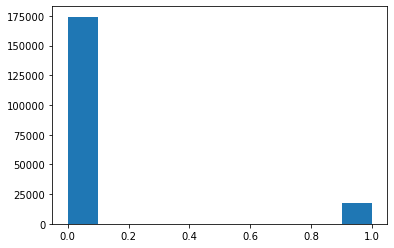

In [35]:
online_purchase = customers_clean.loc[customers_clean['ONLINE_PURCHASE'].notnull(),'ONLINE_PURCHASE']
plt.hist(online_purchase);

In [36]:
# % of customers who bought products online
online_pct = (sum(online_purchase) / len(online_purchase)) * 100

print("Percentage of customers who made purchase online: ", online_pct)

Percentage of customers who made purchase online:  9.02469058501868


In [37]:
product_group = customers_clean.loc[customers_clean["PRODUCT_GROUP"].notnull(),"PRODUCT_GROUP"]

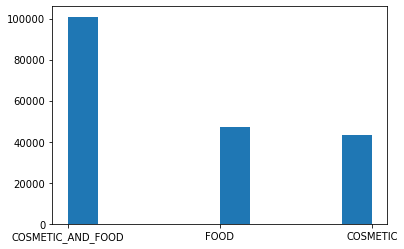

In [38]:
plt.hist(product_group);

In [39]:
# Percentage of 
product_group.value_counts() * 100 / len(product_group)

COSMETIC_AND_FOOD    52.626636
FOOD                 24.722935
COSMETIC             22.650429
Name: PRODUCT_GROUP, dtype: float64

In [40]:
customer_group = customers_clean.loc[customers_clean["CUSTOMER_GROUP"].notnull(),"CUSTOMER_GROUP"]

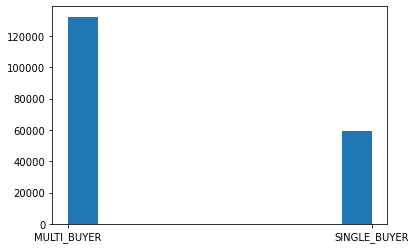

In [41]:
plt.hist(customer_group);

In [42]:
# Percentage of 
customer_group.value_counts() * 100 / len(customer_group)

MULTI_BUYER     68.999019
SINGLE_BUYER    31.000981
Name: CUSTOMER_GROUP, dtype: float64

In [43]:
## Change data types of customer groups and product groups
customers_clean[["CUSTOMER_GROUP","PRODUCT_GROUP"]] = customers_clean[["CUSTOMER_GROUP","PRODUCT_GROUP"]].astype('category')

## Information table

In [44]:
info.head(20)

,Information level,Attribute,Description,Additional notes
1,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
2,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
3,NaN,ANREDE_KZ,gender,NaN
4,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
5,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...
6,NaN,FINANZ_SPARER,financial typology: money saver,NaN
7,NaN,FINANZ_VORSORGER,financial typology: be prepared,NaN
8,NaN,FINANZ_ANLEGER,financial typology: investor,NaN
9,NaN,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,NaN
10,NaN,FINANZ_HAUSBAUER,financial typology: main focus is the own house,NaN


In [45]:
info['Information level'].value_counts()

Person                1
Household             1
Postcode              1
125m x 125m Grid      1
Microcell (RR4_ID)    1
Microcell (RR3_ID)    1
Community             1
Building              1
PLZ8                  1
RR1_ID                1
Name: Information level, dtype: int64

In [46]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 1 to 313
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Information level  10 non-null     object
 1   Attribute          313 non-null    object
 2   Description        313 non-null    object
 3   Additional notes   20 non-null     object
dtypes: object(4)
memory usage: 9.9+ KB


## Analyzing Missing Data

### Column-wise missing percentage

In [47]:
## Find attributes with more than 30 % of missing values in AZDIAS dataset
missing_per_azdias = ((azdias_clean.isna().sum() / azdias_clean.index.size) * 100)

In [48]:
missing_per_azdias[missing_per_azdias > 30]

AGER_TYP        76.019640
ALTER_HH        34.813699
ALTER_KIND1     90.904837
ALTER_KIND2     96.690047
ALTER_KIND3     99.307691
ALTER_KIND4     99.864792
EXTSEL992       73.399639
KBA05_BAUMAX    53.468668
KK_KUNDENTYP    65.596749
TITEL_KZ        99.757636
dtype: float64

In [49]:
## Find attributes with more than 30 % of missing values in CUSTOMERS dataset
missing_per_customers = ((customers_clean.isna().sum() / customers_clean.index.size) * 100)

In [50]:
print(missing_per_customers[missing_per_customers > 30])

AGER_TYP        48.059504
ALTER_HH        35.870745
ALTER_KIND1     93.860748
ALTER_KIND2     97.338927
ALTER_KIND3     99.334732
ALTER_KIND4     99.876860
EXTSEL992       44.498883
KBA05_BAUMAX    57.153069
KK_KUNDENTYP    58.406382
KKK             31.340137
REGIOTYP        31.340137
TITEL_KZ        98.793647
dtype: float64


In [51]:
missing_30_azdias = missing_per_azdias[missing_per_azdias > 30]
missing_30_customers = missing_per_customers[missing_per_customers > 30]

**Now, we will remove union of missing data attributes from both datasets.**

In [52]:
# list of columns to be removed from datasets
remove_cols = list(set().union(missing_30_azdias.index,missing_30_customers.index))
remove_cols

['EXTSEL992',
 'TITEL_KZ',
 'ALTER_HH',
 'ALTER_KIND2',
 'KBA05_BAUMAX',
 'REGIOTYP',
 'KKK',
 'ALTER_KIND4',
 'ALTER_KIND1',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'ALTER_KIND3']

<AxesSubplot:>

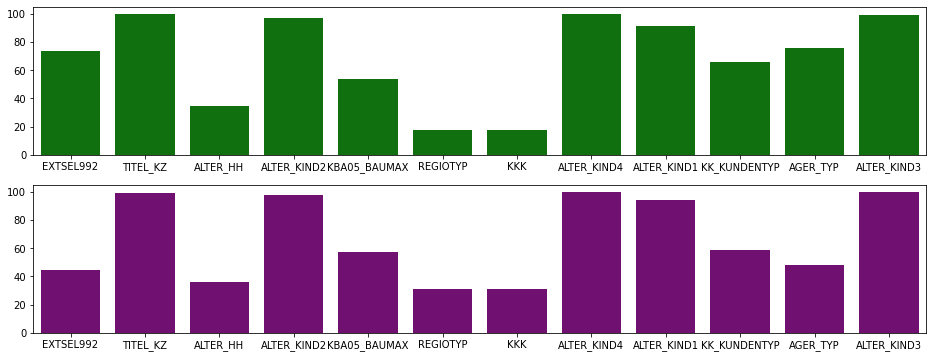

In [53]:
plt.figure(figsize = (16,6))

# plot 1
plt.subplot(2,1,1)
sns.barplot(x = remove_cols , y = missing_per_azdias[remove_cols],color = 'green')
plt.subplot(2,1,2)
sns.barplot(x = remove_cols , y = missing_per_customers[remove_cols],color = 'purple')

## Row-wise missing percentage

In [54]:
missing_azdias_rows = (azdias_clean.isnull().sum(axis = 1) / azdias_clean.columns.size) * 100
print('Number of rows with more than 50 % of missing data NULL ',len(missing_azdias_rows[missing_azdias_rows > 50]))

Number of rows with more than 50 % of missing data NULL  99968


In [55]:
missing_customers_rows = (customers_clean.isnull().sum(axis = 1) / customers_clean.columns.size) * 100
print('Number of rows with more than 50 % of missing data NULL ',len(missing_customers_rows[missing_customers_rows > 50]))

Number of rows with more than 50 % of missing data NULL  50786


In [56]:
## percentage of missing data more than 50 % in rows
pct_missing = (len(missing_azdias_rows[missing_azdias_rows > 50]) / azdias_clean.index.size)
print("Percentage of total rows with more than 50% of the data null",pct_missing)
pct_missing = (len(missing_customers_rows[missing_customers_rows > 50]) / customers_clean.index.size)
print("Percentage of total rows with more than 50% of the data null",pct_missing)

Percentage of total rows with more than 50% of the data null 0.11216970874788633
Percentage of total rows with more than 50% of the data null 0.26499071233276983


## Data Preprocessing

In [57]:
azdias_clean[['CAMEO_INTL_2015','CAMEO_DEUG_2015']].dtypes

CAMEO_INTL_2015    object
CAMEO_DEUG_2015    object
dtype: object

In [58]:
customers_clean[['CAMEO_INTL_2015','CAMEO_DEUG_2015']].dtypes

CAMEO_INTL_2015    object
CAMEO_DEUG_2015    object
dtype: object

In [59]:
num_cols = ['CAMEO_INTL_2015','CAMEO_DEUG_2015']
for col in num_cols:
    azdias_clean[col] = pd.to_numeric(azdias_clean[col] , downcast = 'integer')
    customers_clean[col] = pd.to_numeric(customers_clean[col] , downcast = 'integer')

In [60]:
azdias_clean['LP_STATUS_GROB'].value_counts()

1.0    337511
2.0    226915
4.0    162946
5.0    118022
3.0     40973
Name: LP_STATUS_GROB, dtype: int64

In [61]:
customers_clean['LP_STATUS_GROB'].isnull().sum()

3213

In [62]:
customers_clean["LP_FAMILIE_GROB"].value_counts()

5.0    61285
0.0    47369
1.0    40769
2.0    28937
4.0     8477
3.0     1602
Name: LP_FAMILIE_GROB, dtype: int64

In [63]:
azdias_clean['EINGEFUEGT_AM'] = pd.DatetimeIndex(azdias_clean['EINGEFUEGT_AM']).year
customers_clean['EINGEFUEGT_AM'] = pd.DatetimeIndex(customers_clean['EINGEFUEGT_AM']).year

In [64]:
azdias_clean[['CAMEO_DEU_2015', 'CAMEO_DEUG_2015']].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015
0,NaN,NaN
1,8A,8.0
2,4C,4.0
3,2A,2.0
4,6B,6.0


CAMEO_DEU_2015 is similar to CAMEO_DEUG_2015. It won't add any additional value, so, we'll be removing this also from our dataset.

## Removing Missing data

In [65]:
## list of columns to remove it from dataset
azdias_clean = azdias_clean.drop(remove_cols , axis = 1)
customers_clean = customers_clean.drop(remove_cols , axis = 1)

In [66]:
remove_azdias_rows = missing_azdias_rows[missing_azdias_rows > 50].index
remove_customers_rows = missing_customers_rows[missing_customers_rows > 50].index

In [67]:
azdias_clean = azdias_clean.drop(remove_azdias_rows , axis = 0)
customers_clean = customers_clean.drop(remove_customers_rows , axis = 0)

In [68]:
print("Shape of AZDIAS after deleting missing values:", azdias_clean.shape)
print("Shape of CUSTOMERS after deleting missing values:", customers_clean.shape)

Shape of AZDIAS after deleting missing values: (791253, 355)
Shape of CUSTOMERS after deleting missing values: (140866, 358)


In [69]:
def impute(df):
    """Function to impute missing data with most frequent value
    :param df: dataframe
    :return: imputed dataframe
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_cols = df.select_dtypes(numerics).columns.tolist()

    categoric = ['object', 'category']
    categoric_cols = df.select_dtypes(categoric).columns.tolist()
    
    for cols in [numeric_cols, categoric_cols]:
        print('Imputing {} columns...'.format(cols))
        imputer = SimpleImputer(strategy='most_frequent')
        df[cols] = imputer.fit_transform(df[cols])
    
    return df

In [72]:
# Imputing missing values in columns with their most frequent value
azdias_clean = impute(azdias_clean)
customers_clean = impute(customers_clean)

Imputing ['Unnamed: 0', 'LNR', 'AKT_DAT_KL', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT', 'BALLRAUM', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'CJT_GESAMTTYP', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP', 'D19_KONSUMTYP_MAX', 

Imputing ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'OST_WEST_KZ', 'PRODUCT_GROUP', 'CUSTOMER_GROUP'] columns...


In [74]:
azdias_clean.to_pickle('azdias.pkl')
customers_clean.to_pickle('customers.pkl')

In [75]:
azdias_clean.to_csv('azdias_clean.csv')
customers_clean.to_csv('customers_clean.csv')

## Label Encoding

In [78]:
# droping customers exclusive columns from scaling
diff_attr = ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']


In [79]:
customers_az_clean = customers_clean.drop(diff_attr , axis = 1).copy()

In [81]:
cols = customers_az_clean.columns

In [82]:
customers_az_clean.shape

(140866, 355)

In [83]:
## Encoding Categrical Features
azdias_clean_final = pd.get_dummies(azdias_clean)

In [84]:
customers_clean_final = pd.get_dummies(customers_az_clean)